In [1]:
#The aim of this notebook is to produce a nice cover page for our report. After several trials, we chose
#the last design for our cover page, which is showing a worldmap with countries colored according to the reported
#ladder scores in 2021.

import pandas as pd
df_2021 = pd.read_csv("world-happiness-report-2021.csv")
df_2021.head()

FileNotFoundError: [Errno 2] No such file or directory: 'world-happiness-report-2021.csv'

In [ ]:
df_2021.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df_2021.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                149 non-null    object 
 1   Regional_indicator                          149 non-null    object 
 2   Ladder_score                                149 non-null    float64
 3   Standard_error_of_ladder_score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged_GDP_per_capita                       149 non-null    float64
 7   Social_support                              149 non-null    float64
 8   Healthy_life_expectancy                     149 non-null    float64
 9   Freedom_to_make_life_choices                149 non-null    float64
 10  Generosity    

In [ ]:
text = ""
for comment in df_2021.Country_name :
    text += comment + " "
print(text)

Finland Denmark Switzerland Iceland Netherlands Norway Sweden Luxembourg New Zealand Austria Australia Israel Germany Canada Ireland Costa Rica United Kingdom Czech Republic United States Belgium France Bahrain Malta Taiwan Province of China United Arab Emirates Saudi Arabia Spain Italy Slovenia Guatemala Uruguay Singapore Kosovo Slovakia Brazil Mexico Jamaica Lithuania Cyprus Estonia Panama Uzbekistan Chile Poland Kazakhstan Romania Kuwait Serbia El Salvador Mauritius Latvia Colombia Hungary Thailand Nicaragua Japan Argentina Portugal Honduras Croatia Philippines South Korea Peru Bosnia and Herzegovina Moldova Ecuador Kyrgyzstan Greece Bolivia Mongolia Paraguay Montenegro Dominican Republic North Cyprus Belarus Russia Hong Kong S.A.R. of China Tajikistan Vietnam Libya Malaysia Indonesia Congo (Brazzaville) China Ivory Coast Armenia Nepal Bulgaria Maldives Azerbaijan Cameroon Senegal Albania North Macedonia Ghana Niger Turkmenistan Gambia Benin Laos Bangladesh Guinea South Africa Turke

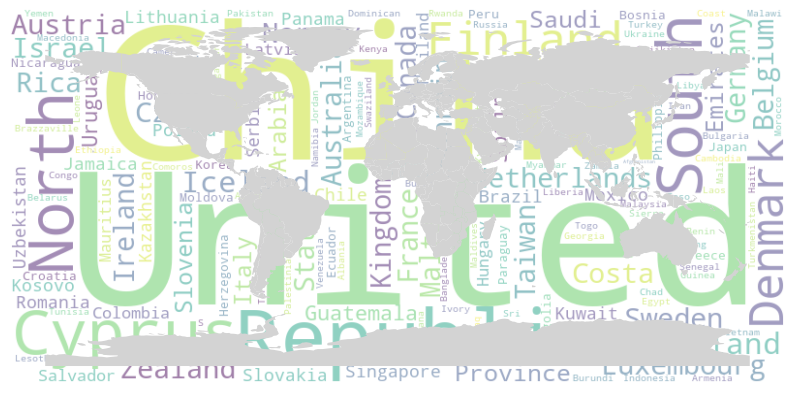

In [ ]:
import geopandas as gpd
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
import io

import warnings
warnings.filterwarnings('ignore')

# Step 1: Creating a Word Cloud
text = "Finland Denmark Switzerland Iceland Netherlands Norway Sweden Luxembourg New Zealand Austria Australia Israel Germany Canada Ireland Costa Rica United Kingdom Czech Republic United States Belgium France Bahrain Malta Taiwan Province of China United Arab Emirates Saudi Arabia Spain Italy Slovenia Guatemala Uruguay Singapore Kosovo Slovakia Brazil Mexico Jamaica Lithuania Cyprus Estonia Panama Uzbekistan Chile Poland Kazakhstan Romania Kuwait Serbia El Salvador Mauritius Latvia Colombia Hungary Thailand Nicaragua Japan Argentina Portugal Honduras Croatia Philippines South Korea Peru Bosnia and Herzegovina Moldova Ecuador Kyrgyzstan Greece Bolivia Mongolia Paraguay Montenegro Dominican Republic North Cyprus Belarus Russia Hong Kong S.A.R. of China Tajikistan Vietnam Libya Malaysia Indonesia Congo (Brazzaville) China Ivory Coast Armenia Nepal Bulgaria Maldives Azerbaijan Cameroon Senegal Albania North Macedonia Ghana Niger Turkmenistan Gambia Benin Laos Bangladesh Guinea South Africa Turkey Pakistan Morocco Venezuela Georgia Algeria Ukraine Iraq Gabon Burkina Faso Cambodia Mozambique Nigeria Mali Iran Uganda Liberia Kenya Tunisia Lebanon Namibia Palestinian Territories Myanmar Jordan Chad Sri Lanka Swaziland Comoros Egypt Ethiopia Mauritania Madagascar Togo Zambia Sierra Leone India Burundi Yemen Tanzania Haiti Malawi Lesotho Botswana Rwanda Zimbabwe Afghanistan "
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Saving the word cloud image
wordcloud.to_file('wordcloud.png')

# Step 2: Loading the World Map
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("shapefiles")

# Reading the shapefile using GeoPandas
world = gpd.read_file("shapefiles/ne_110m_admin_0_countries.shp")

# Step 3: Preparing for Overlay
# Create a blank image with the same size as the world map
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the world map
world.plot(ax=ax, color='lightgrey')

# Loading the word cloud image
wordcloud_image = Image.open('wordcloud.png')

# Overlaying the word cloud onto the world map
plt.imshow(wordcloud_image, interpolation='bilinear', alpha=0.5, extent=ax.get_xlim() + ax.get_ylim())
plt.axis('off')

# Show the final image
plt.show()

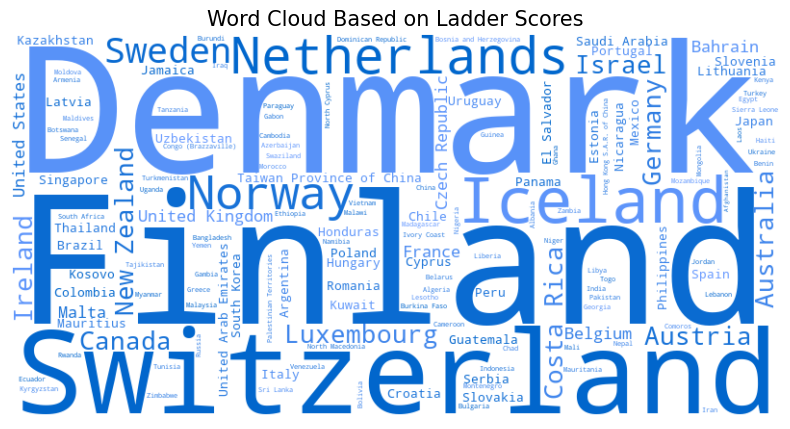

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Preparing the data for WordCloud
# The 'width' of each word in the word cloud is determined by the 'Score'
word_freq = dict(zip(df_2021['Country_name'], df_2021['Ladder_score']))

# Defining a custom colormap (darker pastel blue)
darker_pastel_blue_cmap = LinearSegmentedColormap.from_list(
    "darker_pastel_blue", ["#0066cc", "#6699ff"])

# Creating a word cloud with custom coloring
wordcloud = WordCloud(
    width=800,
    height=400,
    colormap=darker_pastel_blue_cmap,
    background_color='white',
    relative_scaling=0.5,  # Relative scaling between frequency and word size
).generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Based on Ladder Scores', fontsize=15)
plt.show()

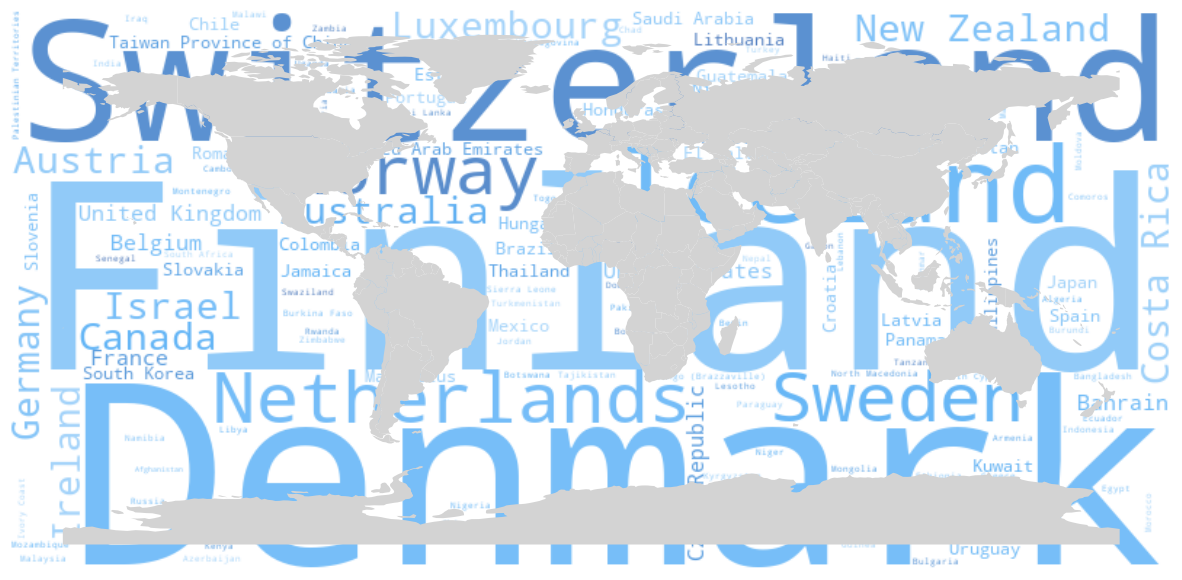

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import geopandas as gpd

# Defining a colormap for ladder scores
darker_pastel_blue_colors = ['#90caf9', '#64b5f6', '#42a5f5', '#2196f3', '#1976d2', '#0d47a1']
darker_pastel_blue_cmap = LinearSegmentedColormap.from_list('darker_pastel_blue', darker_pastel_blue_colors)

# Preparing the data for WordCloud
word_freq = dict(zip(df_2021['Country_name'], df_2021['Ladder_score']))

# Creating a word cloud with color based on ladder scores
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=darker_pastel_blue_cmap,
    relative_scaling=0.5,  # Adjust word size relative to frequency
).generate_from_frequencies(word_freq)

# Saving the word cloud image
wordcloud.to_file('wordcloud.png')

# Step 2: Loading the World Map
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("shapefiles")

# Reading the shapefile using GeoPandas
world = gpd.read_file("shapefiles/ne_110m_admin_0_countries.shp")

# Step 3: Prepare for Overlay
# Create a blank image with the same size as the world map
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the world map
world.plot(ax=ax, color='lightgrey')

# Loading the word cloud image
wordcloud_image = Image.open('wordcloud.png')

# Overlaying the word cloud onto the world map
plt.imshow(wordcloud_image, interpolation='bilinear', alpha=0.7, extent=ax.get_xlim() + ax.get_ylim())
plt.axis('off')

# Showing the final image
plt.show()

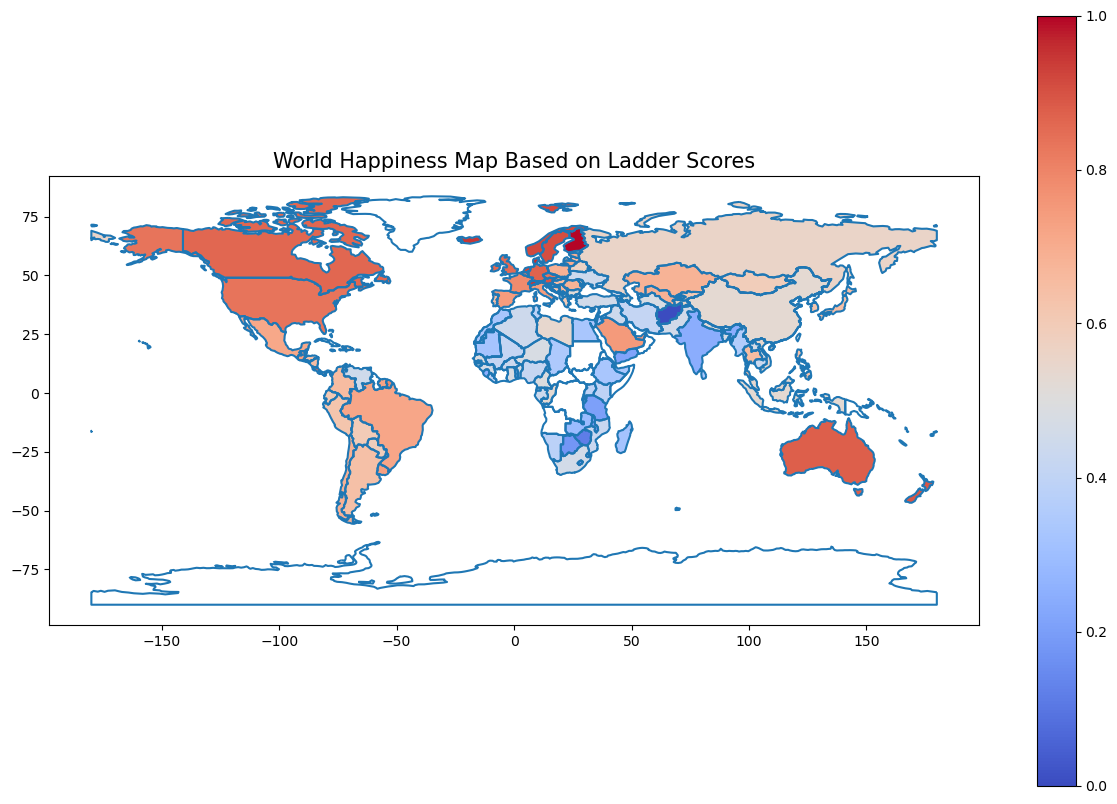

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from fuzzywuzzy import process

# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Defining a function for fuzzy matching
def get_closest_match(name, choices):
    match, score = process.extractOne(name, choices)
    return match

# Applying fuzzy matching to map country names to ISO codes
world_names = world['name'].unique()
df_2021['matched_country'] = df_2021['Country_name'].apply(lambda x: get_closest_match(x, world_names))

# Merging the world map with the ladder scores DataFrame using fuzzy matched country names
world = world.merge(df_2021, how="left", left_on="name", right_on="matched_country")

# Normalizing ladder scores to [0, 1] range for coloring
min_score = world['Ladder_score'].min()
max_score = world['Ladder_score'].max()
world['normalized_score'] = (world['Ladder_score'] - min_score) / (max_score - min_score)

# Plotting the world map with colors based on the normalized ladder scores
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting boundaries
world.boundary.plot(ax=ax)

# Plotting the countries with the ladder score colors
world.plot(column='normalized_score', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adding title and other plot details
plt.title('World Happiness Map Based on Ladder Scores', fontsize=15)
plt.show()


#This is the design we chose as cover page.